In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
from scipy.optimize import curve_fit

def line(x, slope):
    return slope*x

# 1. Load data

In [3]:
data = pd.read_csv('<path/to/your>/01_select_hits/01_check_Trp/near_perfect_matches_with_rif_scores.csv',index_col=0)
data.head()

,query_name,query_len,hit_len,match_name,mismatches_query,mismatches_alignment,algn_len,score,e_val,AA,...,delta_sap_binder,delta_sap_target,length,short_name,name,just_trp_rif_score,just_trp_rif_bb-hbond,just_trp_rif_hyd-cont,just_trp_rif_hyd-ddg,mut_str
0,seq286505,56,56.0,H2Db_02189_std,1.0,1.0,56.0,234.0,1.840390e-29,DREERIKELLEEARHIEDPEEVRRLIEEALHLASERGDMELAIEIL...,...,18.488,10.557,56.0,H2Db_02189_std,HHH_b1_05107_000000173_std_0001_0001,-1.482,0.0,0.0,-0.0,L36R
1,seq286506,56,56.0,H2Db_09766_std,1.0,1.0,56.0,254.0,1.737830e-32,DEREALELLDKALEALAHGNPEEARKLLEKALRLARKTNNKWLEKA...,...,23.668,12.334,56.0,H2Db_09766_std,HHH_b2_05387_000000258_std_0001_0001,1.260,0.0,0.0,-0.0,I47F
2,seq286507,57,57.0,H2Db_05151_std_graft,1.0,1.0,57.0,251.0,5.221990e-32,DEDEEQVRRLLRAAEEYLKECNPEVARLLLFAARQIAERLGDEELR...,...,17.738,9.259,57.0,H2Db_05151_std_graft,m_HHH_b1_07861_000000265_std_0001_27_38_H_._HH...,-0.502,0.0,0.0,-0.0,G21C
3,seq286509,52,52.0,H2Db_05352_std_graft,1.0,1.0,52.0,224.0,5.061150e-28,DAEELLKLAKRLLEEGDPEKARELALFALIAAIFEGDDELLREIRE...,...,22.575,9.433,52.0,H2Db_05352_std_graft,m_HHH_b1_00493_000000142_std_0001_28_35_H_._HH...,-1.787,0.0,0.0,-0.0,R41L
4,seq286512,56,56.0,H2Db_02062_std_graft,1.0,1.0,56.0,247.0,1.581380e-31,TKRALEALLEQLERLLREGDPEEFRHLLLLAKLLSRVLNDEEVLKE...,...,25.474,9.625,56.0,H2Db_02062_std_graft,m_HHH_b1_06629_000000104_std_0001_22_37_H_._HH...,-1.869,0.0,0.0,-0.0,A35S


# 2. Remove noisy sequences

In [5]:
#fill in missing count values with 0.5
#these are sequences that are observed in a different sample, but not the one where the value is missing
#use 0.5 instead of 0 to avoid divide by zero errors later

count_cols = [x for x in data.columns if 'count' in x]
vals = data[count_cols].values
vals[np.isnan(vals)] = 0.5
data[count_cols] = vals

[]

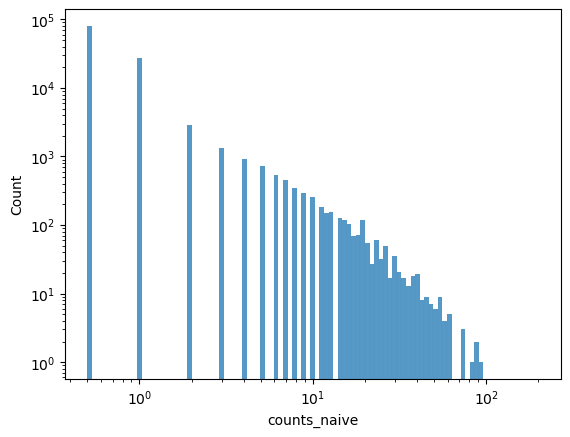

In [6]:
bins = np.logspace(np.log10(0.5),2.3,100)
sns.histplot(data['counts_naive'],kde=False,bins=bins)
plt.loglog()

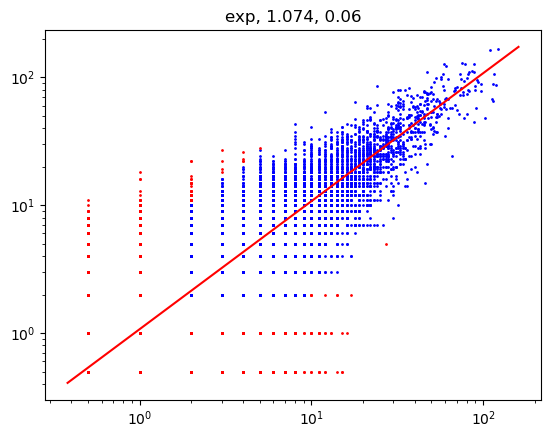

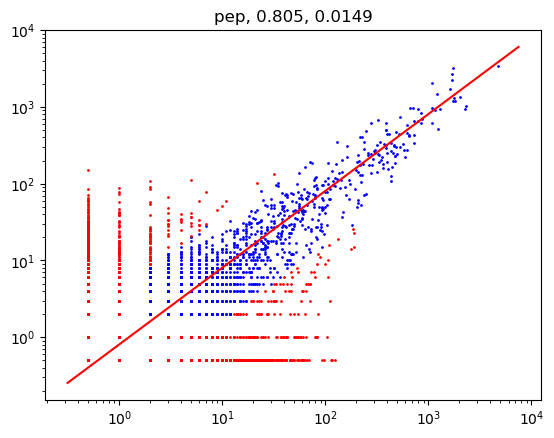

In [7]:
for lib in ['exp','pep']:
    
    rep1 = data['counts_'+lib+'1']
    rep2 = data['counts_'+lib+'2']
    slope,var = curve_fit(line,rep1,rep2)
    
    close_to_line = np.abs(np.log10(rep1) - np.log10(rep2) + np.log10(slope))/np.sqrt(2) < 0.5
    enough_counts = (rep1 > 1) & (rep2 > 1)
    good_idx = close_to_line & enough_counts
    
    plt.figure()
    plt.plot(rep1[good_idx],rep2[good_idx],'bo',markersize=1)
    plt.plot(rep1[~good_idx],rep2[~good_idx],'ro',markersize=1)
    plt.loglog()
    
    xlimits = plt.xlim()
    x_plot = np.logspace(np.log10(xlimits[0]),np.log10(xlimits),1000)
    plt.plot(x_plot,x_plot*slope,'r')
    
    plt.title(lib + ', ' + str(round(slope[0],3)) + ', ' + str(round(np.sum(good_idx)/len(good_idx),4)))
    
    data.insert(len(data.columns),lib+'_filter',good_idx)

In [8]:
data.head()

,query_name,query_len,hit_len,match_name,mismatches_query,mismatches_alignment,algn_len,score,e_val,AA,...,length,short_name,name,just_trp_rif_score,just_trp_rif_bb-hbond,just_trp_rif_hyd-cont,just_trp_rif_hyd-ddg,mut_str,exp_filter,pep_filter
0,seq286505,56,56.0,H2Db_02189_std,1.0,1.0,56.0,234.0,1.840390e-29,DREERIKELLEEARHIEDPEEVRRLIEEALHLASERGDMELAIEIL...,...,56.0,H2Db_02189_std,HHH_b1_05107_000000173_std_0001_0001,-1.482,0.0,0.0,-0.0,L36R,False,False
1,seq286506,56,56.0,H2Db_09766_std,1.0,1.0,56.0,254.0,1.737830e-32,DEREALELLDKALEALAHGNPEEARKLLEKALRLARKTNNKWLEKA...,...,56.0,H2Db_09766_std,HHH_b2_05387_000000258_std_0001_0001,1.260,0.0,0.0,-0.0,I47F,False,False
2,seq286507,57,57.0,H2Db_05151_std_graft,1.0,1.0,57.0,251.0,5.221990e-32,DEDEEQVRRLLRAAEEYLKECNPEVARLLLFAARQIAERLGDEELR...,...,57.0,H2Db_05151_std_graft,m_HHH_b1_07861_000000265_std_0001_27_38_H_._HH...,-0.502,0.0,0.0,-0.0,G21C,False,False
3,seq286509,52,52.0,H2Db_05352_std_graft,1.0,1.0,52.0,224.0,5.061150e-28,DAEELLKLAKRLLEEGDPEKARELALFALIAAIFEGDDELLREIRE...,...,52.0,H2Db_05352_std_graft,m_HHH_b1_00493_000000142_std_0001_28_35_H_._HH...,-1.787,0.0,0.0,-0.0,R41L,False,False
4,seq286512,56,56.0,H2Db_02062_std_graft,1.0,1.0,56.0,247.0,1.581380e-31,TKRALEALLEQLERLLREGDPEEFRHLLLLAKLLSRVLNDEEVLKE...,...,56.0,H2Db_02062_std_graft,m_HHH_b1_06629_000000104_std_0001_22_37_H_._HH...,-1.869,0.0,0.0,-0.0,A35S,False,False


In [9]:
filter_cols = [x for x in data.columns if 'filter' in x]
filtered = data[np.any(data[filter_cols].values, axis=1)]
filtered.head()

,query_name,query_len,hit_len,match_name,mismatches_query,mismatches_alignment,algn_len,score,e_val,AA,...,length,short_name,name,just_trp_rif_score,just_trp_rif_bb-hbond,just_trp_rif_hyd-cont,just_trp_rif_hyd-ddg,mut_str,exp_filter,pep_filter
235,seq241527,56,56.0,H2Db_01432_std,0.0,0.0,56.0,255.0,9.393130e-33,DEERVKKLLEEVRKLLKKGDRERARELLFEALAIALQANDPELLEE...,...,56.0,H2Db_01432_std,HHH_b2_05952_000000139_std_0001_0001,-0.430,0.0,0.0,-0.0,NaN,True,False
249,seq241554,57,57.0,H2Db_03858_std,1.0,1.0,57.0,249.0,1.054830e-31,DEEEEEVRELLRRAEEAKKEGDEELVAELLFRALAVAAQIDNPELL...,...,57.0,H2Db_03858_std,HHH_b2_06296_000000208_std_0001_0001,3.545,0.0,0.0,-0.0,V52L,True,False
283,seq241625,56,56.0,H2Db_03928_std,0.0,0.0,56.0,261.0,1.244130e-33,DREERIEELLRRAEELAKEGNPREAFQLLLEAFNLAAELGDEELLQ...,...,56.0,H2Db_03928_std,HHH_b2_04714_000000143_std_0001_0001,2.443,0.0,0.0,-0.0,NaN,True,False
287,seq241631,55,55.0,H2Db_01508_std,1.0,1.0,55.0,258.0,3.851580e-33,DDEKAERLLEKAKELLKNGNPREAWEVAMQAAAIARLTNNQELFEE...,...,55.0,H2Db_01508_std,HHH_b2_06661_000000092_std_0001_0001,-1.456,0.0,0.0,-0.0,L36R,True,False
402,seq241868,54,54.0,H2Db_08123_std,1.0,1.0,54.0,239.0,2.626530e-30,DEEREEARRLTERAKHLEDPKERRELLLRAAALALVGNDKELAQEI...,...,54.0,H2Db_08123_std,HHH_b2_01410_000000268_std_0001_0001,-0.279,0.0,0.0,-0.0,L36V,True,False


# 3. calculate enrichment values

In [11]:
filtered.loc[:,'design_type'] = ['Shuffle' if ('shuf' in row['match_name']) else '+Trp' if (row['just_trp_rif_hyd-ddg'] < -3) else '-Trp' for i,row in filtered.iterrows()]

/var/folders/1r/_dnhk2ss6m3fr8s3lgl4kcmw0000gn/T/ipykernel_66355/408911275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.loc[:,'design_type'] = ['Shuffle' if ('shuf' in row['match_name']) else '+Trp' if (row['just_trp_rif_hyd-ddg'] < -3) else '-Trp' for i,row in filtered.iterrows()]


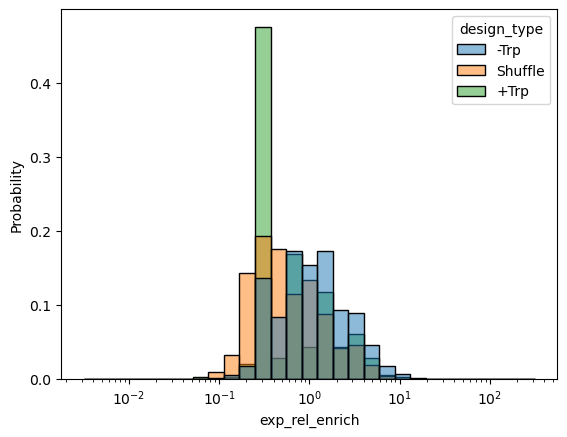

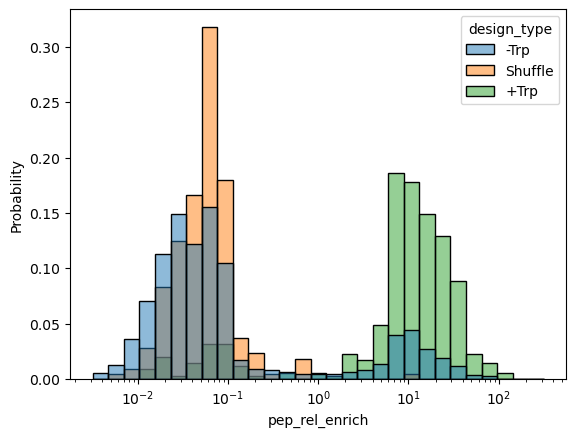

In [12]:
lib_names = ['exp','pep']
parent = {
    'exp':'naive',
    'pep':'exp'
}
for i,lib in enumerate(lib_names):
    rep1 = filtered['counts_'+lib+'1'].copy()
    rep2 = filtered['counts_'+lib+'2'].copy()
    
    rep1[rep1<1] = 0
    rep2[rep2<1] = 0
    tot = rep1+rep2
    tot[tot==0] = 0.5
    
    frac = tot/np.sum(tot)
    
    if lib == 'exp':
        frac_prev = filtered['counts_naive']/np.sum(filtered['counts_naive'])
    else:
        rep1_prev = filtered['counts_'+parent[lib]+'1'].copy()
        rep2_prev = filtered['counts_'+parent[lib]+'2'].copy()
        
        rep1_prev[rep1_prev<1] = 0
        rep2_prev[rep2_prev<1] = 0
        tot_prev = rep1_prev+rep2_prev
        tot_prev[tot_prev==0] = 0.5
        
        frac_prev = tot_prev/np.sum(tot_prev)
        
    filtered.insert(len(filtered.columns), lib+'_rel_enrich', frac/frac_prev)
    
    plt.figure()
    sns.histplot(data=filtered,x=lib+'_rel_enrich',hue='design_type',
                 log_scale=True,bins=np.linspace(-2.5,2.5,30),stat='probability',common_norm=False)

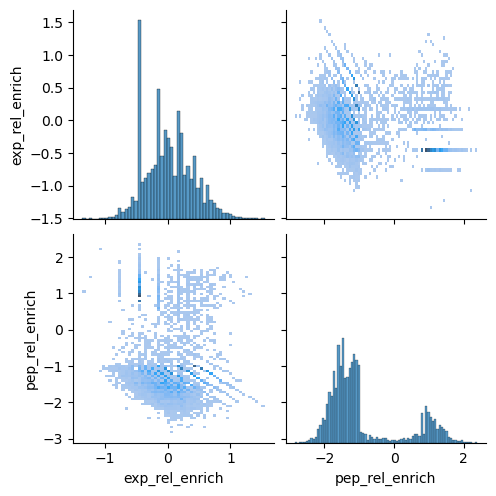

In [13]:
sns.pairplot(np.log10(filtered[['exp_rel_enrich','pep_rel_enrich']]),kind='hist')

# 4. select hits

In [15]:
#get sequences with reasonalble enrichment in both sorting experiments
hits = filtered[(filtered['exp_rel_enrich']>1) & (filtered['pep_rel_enrich']>2)].sort_values(by='pep_rel_enrich',ascending=False)

#get sequences that have reasonable abundance to improve confidence in the enrichment values
hits = hits[hits[['counts_exp1','counts_exp2']].sum(axis=1) > 5.5].reset_index()

hits[['description','match_name','exp_rel_enrich','pep_rel_enrich','mut_str',
     'counts_naive','counts_exp1','counts_exp2',
     'counts_pep1','counts_pep2']].head(20)

,description,match_name,exp_rel_enrich,pep_rel_enrich,mut_str,counts_naive,counts_exp1,counts_exp2,counts_pep1,counts_pep2
0,HHH_b1_03609_000000257_std_0001_0001,H2Db_06717_std,1.051980,89.696064,NaN,2.0,0.5,6.0,473.0,185.0
1,m_HHH_b1_01548_000000173_std_0001_24_31_H_._HH...,H2Db_09138_std_graft,1.227310,58.421232,A36S,2.0,3.0,4.0,293.0,207.0
2,m_HHH_b1_01548_000000173_std_0001_24_31_H_._HH...,H2Db_09138_std_graft,6.311881,47.528918,L25Q,0.5,4.0,5.0,329.0,194.0
3,HHH_b2_02941_000000180_nat_0001_0001,H2Db_07156_nat,5.259901,45.366034,NaN,1.0,2.0,13.0,529.0,303.0
4,HHH_b1_08759_000000290_nat_0001_0001,H2Db_03208_nat,4.909241,42.851973,NaN,2.0,7.0,21.0,849.0,618.0
5,HHH_b2_04480_000000136_nat_0001_0001,H2Db_01293_nat,1.262376,40.849423,NaN,5.0,7.0,11.0,627.0,272.0
6,HHH_b2_03370_000000296_std_0001_0001,H2Db_03823_std,1.577970,40.440475,A25S,2.0,3.0,6.0,268.0,177.0
7,HHH_b1_06420_000000070_nat_0001_0001,H2Db_02054_nat,5.347566,36.291397,NaN,12.0,61.0,122.0,4751.0,3369.0
8,HHH_b1_06364_000000043_nat_0001_0001,H2Db_08721_nat,3.556695,36.263951,NaN,7.0,22.0,49.0,1075.0,2073.0
9,HHH_b2_08355_000000190_std_0001_0001,H2Db_06572_std,2.279290,36.050394,NaN,4.0,9.0,17.0,722.0,424.0


In [16]:
# select manually based on
    # enrichment
    # presence of multiple mutants of the same design in the top 20
    # using the unmutated version if both are present in the top 20
selected_idx = [0,11,3,4,5,7] #THESE INDEXES WILL BE DIFFERENT IF YOU ARE USING YOUR OWN DATA

rename = []
with open('<desired/path/to>/manual_hits.fasta','w') as f:
    for i,idx in enumerate(selected_idx):
        name = f'hit{i+1}'
        seq = hits.loc[idx,'AA']
        rename.append([name,hits.loc[idx,'match_name']])
        f.write(f'>{name}\n{seq}\n')

rename = pd.DataFrame(rename,columns=['short_name','order_name'])
rename.to_csv('<desired/path/to>/manual_hit_rename.csv')

In [17]:
manual_hit_names = set(rename['short_name'].tolist())
trp_hits = hits[hits['just_trp_rif_hyd-ddg']<-3]
trp_hits = trp_hits[trp_hits['match_name'].map(lambda x: x not in manual_hit_names)].head(24)
trp_hits[['description','match_name','exp_rel_enrich','pep_rel_enrich','mut_str','just_trp_rif_hyd-ddg']]

,description,match_name,exp_rel_enrich,pep_rel_enrich,mut_str,just_trp_rif_hyd-ddg
5,HHH_b2_04480_000000136_nat_0001_0001,H2Db_01293_nat,1.262376,40.849423,NaN,-4.76
12,HHH_b2_01514_000000100_nat_0001_0001,H2Db_03183_nat,1.987074,33.678122,NaN,-4.48
13,HHH_b1_06234_000000194_nat_0001_0001,H2Db_04185_nat,4.207921,33.397471,L36R,-4.48
14,HHH_b1_05634_000000021_nat_0001_0001,H2Db_00818_nat,2.235458,33.229080,NaN,-6.16
15,HHH_b1_06234_000000194_nat_0001_0001,H2Db_04185_nat,9.467821,32.291795,NaN,-4.48
17,HHH_b1_05395_000000109_nat_0001_0001,H2Db_02220_nat,5.259901,32.007045,NaN,-4.76
26,HHH_b1_01021_000000232_nat_0001_0001,H2Db_00327_nat,2.980610,29.444301,NaN,-5.04
28,HHH_b1_08369_000000124_nat_0001_0001,H2Db_01017_nat,1.870187,28.984234,NaN,-3.92
34,HHH_b1_01150_000000187_nat_0001_0001,H2Db_01612_nat,3.389714,28.212754,NaN,-5.60
36,HHH_b1_06856_000000147_nat_0001_0001,H2Db_01498_nat,3.681930,27.457979,NaN,-4.76


In [18]:
rename = []
with open('<desired/path/to>/trp_hits.fasta','w') as f:
    for i,idx in enumerate(selected_idx):
        name = f'hit{i+7}'
        seq = hits.loc[idx,'AA']
        rename.append([name,hits.loc[idx,'match_name']])
        f.write(f'>{name}\n{seq}\n')

rename = pd.DataFrame(rename,columns=['short_name','order_name'])
rename.to_csv('<desired/path/to>/trp_hit_rename.csv')